In [7]:
#Load the CSV
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/MyDrive/Diabets2/diabetes.csv', header=None)

# Assign column names based on typical diabetes dataset structure
df.columns = [
    'gender', 'age', 'hypertension', 'heart_disease',
    'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'
]

print(df.head())
print(df.info())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0  gender   age  hypertension  heart_disease  smoking_history    bmi   
1  Female  80.0             0              1            never  25.19   
2  Female  54.0             0              0          No Info  27.32   
3    Male  28.0             0              0            never  27.32   
4  Female  36.0             0              0          current  23.45   

   HbA1c_level  blood_glucose_level  diabetes  
0  HbA1c_level  blood_glucose_level  diabetes  
1          6.6                  140         0  
2          6.6                   80         0  
3          5.7                  158         0  
4          5.0                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   gender               100001 non-null  object
 1   age           

/tmp/ipython-input-1972748157.py:5: DtypeWarning: Columns (1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Diabets2/diabetes.csv', header=None)


Exploratory Data Analysis (EDA)

In [8]:
#Step 1: Check for Missing/Inconsistent Values
print(df.isnull().sum())  # No explicit NaNs, but "No Info" is a placeholder
df.replace("No Info", pd.NA, inplace=True)
print(df.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64


In [9]:
#Step 2: Data Types & Summary Stats
print(df.dtypes)
print(df.describe())

gender                 object
age                    object
hypertension           object
heart_disease          object
smoking_history        object
bmi                    object
HbA1c_level            object
blood_glucose_level    object
diabetes               object
dtype: object
        gender     age hypertension heart_disease smoking_history     bmi  \
count   100001  100001       100001        100001           64185  100001   
unique       4     205            5             5               6    7505   
top     Female    80.0            0             0           never   27.32   
freq     58552    3656        60665         62977           35095   16755   

       HbA1c_level blood_glucose_level diabetes  
count       100001              100001   100001  
unique          37                  37        5  
top            6.6                 160        0  
freq          5587                5095    59864  


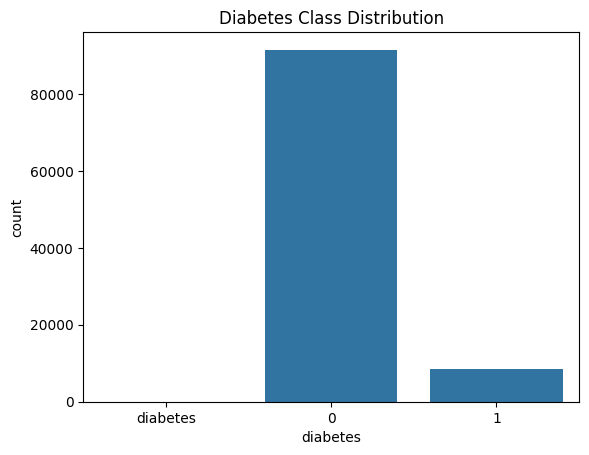

diabetes
0           0.598634
0           0.316357
1           0.056709
1           0.028290
diabetes    0.000010
Name: proportion, dtype: float64


In [10]:
#Step 3: Target Distribution (Class Balance)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Class Distribution")
plt.show()

print(df['diabetes'].value_counts(normalize=True))

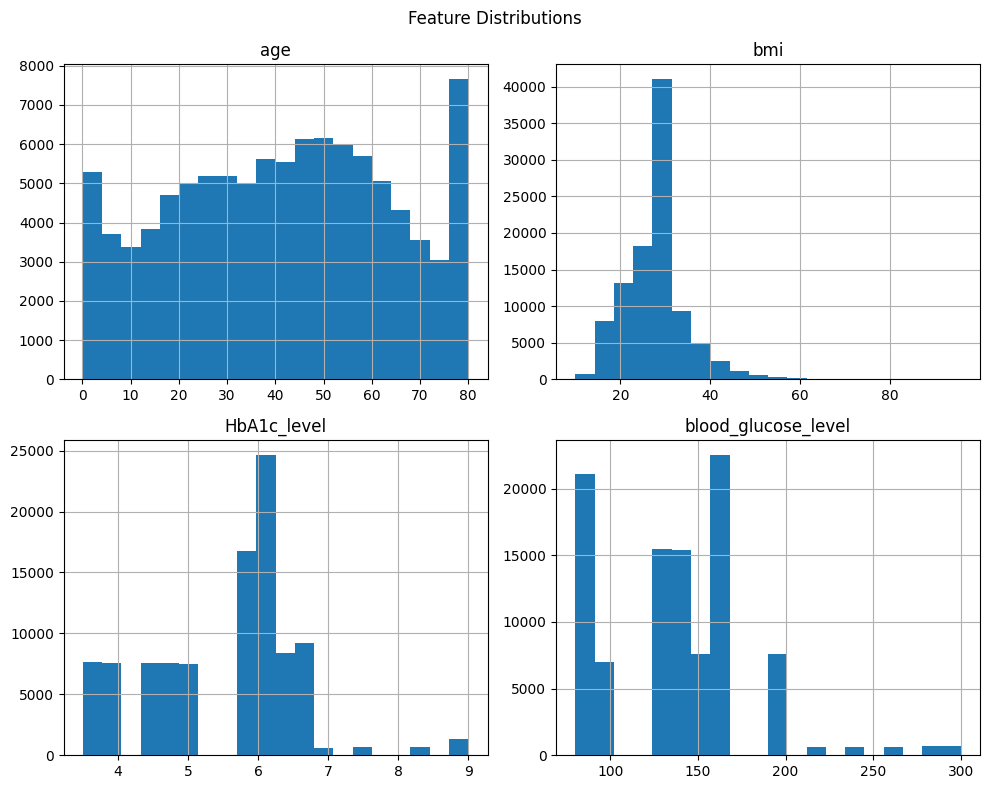

In [11]:

#Step 4: Feature Distributions
import pandas as pd
import matplotlib.pyplot as plt


# Replace 'No Info' with NaN
df.replace("No Info", pd.NA, inplace=True)

# Convert numeric columns
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now plot
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[num_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

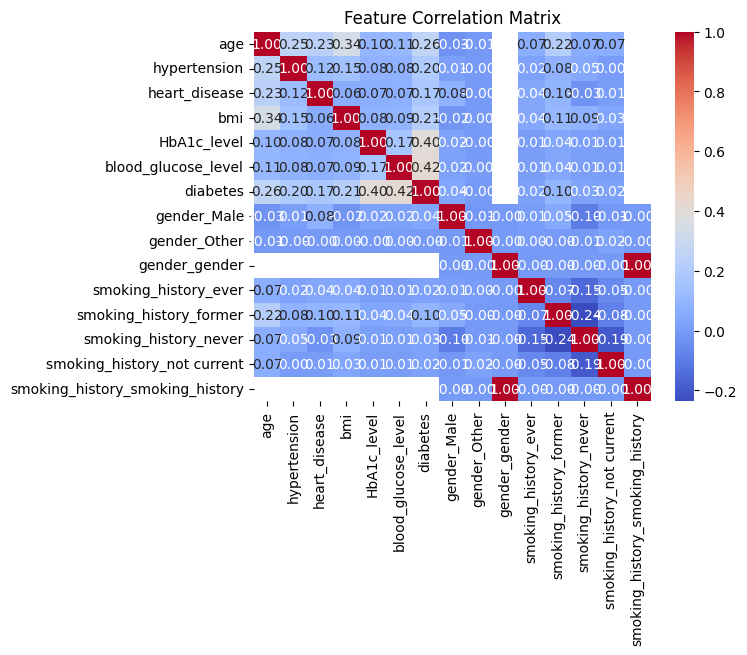

In [12]:

#Correlation heatmap
import numpy as np

# Convert diabetes to numeric (already is), encode gender temporarily
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

corr = df_encoded.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

🧹 4. Data Preprocessing

In [13]:
# Ensure all missing values in 'smoking_history' are np.nan for SimpleImputer compatibility
df['smoking_history'] = df['smoking_history'].replace({pd.NA: np.nan})

# Impute smoking_history with mode (most frequent value)
from sklearn.impute import SimpleImputer
imputer_smoke = SimpleImputer(strategy='most_frequent')
df['smoking_history'] = imputer_smoke.fit_transform(df[['smoking_history']]).ravel()

# Impute BMI (numerical) with median
imputer_bmi = SimpleImputer(strategy='median')
df['bmi'] = imputer_bmi.fit_transform(df[['bmi']])

In [14]:
#Step 2: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])  # Female=0, Male=1

# Smoking history: 'never', 'ever', 'current', 'former', 'not current'
le_smoke = LabelEncoder()
df['smoking_history'] = le_smoke.fit_transform(df['smoking_history'])

In [15]:
#Step 3: Normalize Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df[num_features] = scaler.fit_transform(df[num_features])

In [16]:
#Step 4: Address Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Remove rows where y is NaN
mask = ~y.isna()
X_clean = X[mask]
y_clean = y[mask]

# Only apply SMOTE if imbalance is severe
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_clean, y_clean)

print("Resampled class distribution:\n", y_res.value_counts())

Resampled class distribution:
 diabetes
0.0    91500
1.0    91500
Name: count, dtype: int64


5. Feature Selection & Engineering

In [17]:
#Step 1: Feature Importance (Tree-based)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print(feat_importance)

HbA1c_level            0.365483
blood_glucose_level    0.280501
age                    0.189533
bmi                    0.110865
hypertension           0.021599
smoking_history        0.013743
heart_disease          0.013250
gender                 0.005026
dtype: float64


In [18]:
#Step 2: Engineer New Features
# Example: Glucose-to-HbA1c ratio (proxy for glycemic variability)
df['glucose_hba1c_ratio'] = df['blood_glucose_level'] / (df['HbA1c_level'] + 1e-4)

# Age group bins
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 80], labels=[0, 1, 2])

6. Model Selection

We’ll evaluate multiple models using cross-validation.

In [19]:
!pip install tqdm
from tqdm import tqdm
import time
import pandas as pd

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Safely compute scale_pos_weight
neg, pos = len(y_res[y_res == 0]), len(y_res[y_res == 1])
scale_pos_weight = neg / pos if pos > 0 else 1.0
print(f"Class distribution - Negative (0): {neg}, Positive (1): {pos}")
print(f"Using scale_pos_weight = {scale_pos_weight:.2f}\n")

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42, max_iter=2000),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False,
        verbosity=0  # Suppress XGBoost internal output
    )
}

# Evaluate with progress bar
results = {}

for name in tqdm(models.keys(), desc="Training Models"):
    print(f"\n🟡 Training {name}...")
    start_time = time.time()

    try:
        cv_scores = cross_validate(
            models[name], X_res, y_res, cv=5,
            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
            n_jobs=-1  # Use all CPU cores (speeds up training)
        )

        end_time = time.time()
        duration = end_time - start_time

        results[name] = {
            'Accuracy': cv_scores['test_accuracy'].mean(),
            'Precision': cv_scores['test_precision'].mean(),
            'Recall': cv_scores['test_recall'].mean(),
            'F1': cv_scores['test_f1'].mean(),
            'ROC-AUC': cv_scores['test_roc_auc'].mean(),
            'Time (s)': round(duration, 2)
        }

        print(f"✅ {name} completed in {duration:.2f} seconds")
        print(f"   F1: {results[name]['F1']:.3f}, ROC-AUC: {results[name]['ROC-AUC']:.3f}")

    except Exception as e:
        print(f"❌ Error training {name}: {str(e)}")
        pass

# Display results
print("\n📊 Final Results:")
results_df = pd.DataFrame(results).T
print(results_df)

Class distribution - Negative (0): 91500, Positive (1): 91500
Using scale_pos_weight = 1.00



Training Models:   0%|          | 0/4 [00:00<?, ?it/s]


🟡 Training Logistic Regression...


Training Models:  25%|██▌       | 1/4 [00:03<00:11,  3.86s/it]

✅ Logistic Regression completed in 3.86 seconds
   F1: 0.885, ROC-AUC: 0.962

🟡 Training Random Forest...


Training Models:  50%|█████     | 2/4 [01:20<01:32, 46.39s/it]

✅ Random Forest completed in 76.16 seconds
   F1: 0.977, ROC-AUC: 0.998

🟡 Training SVM...


Training Models:  75%|███████▌  | 3/4 [16:23<07:17, 437.71s/it]

✅ SVM completed in 903.39 seconds
   F1: 0.738, ROC-AUC: 0.814

🟡 Training XGBoost...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Training Models: 100%|██████████| 4/4 [16:30<00:00, 247.74s/it]

✅ XGBoost completed in 7.55 seconds
   F1: 0.974, ROC-AUC: 0.997

📊 Final Results:
                     Accuracy  Precision    Recall        F1   ROC-AUC  \
Logistic Regression  0.884962   0.886834  0.882546  0.884683  0.962491   
Random Forest        0.977421   0.975826  0.979213  0.977283  0.997976   
SVM                  0.708973   0.690386  0.810546  0.738242  0.814142   
XGBoost              0.975164   0.992996  0.957268  0.973791  0.997228   

                     Time (s)  
Logistic Regression      3.86  
Random Forest           76.16  
SVM                    903.39  
XGBoost                  7.55  


🛠️ 7. Model Training & Validation

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

Step 2: Hyperparameter Tuning (Example: XGBoost)

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20,
                                   scoring='f1', cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Best params:", random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:16:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.9}


📊 8. Model Evaluation

In [23]:
#Step 1: Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18300
         1.0       0.99      0.97      0.98     18300

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

ROC-AUC: 0.9977084206754457


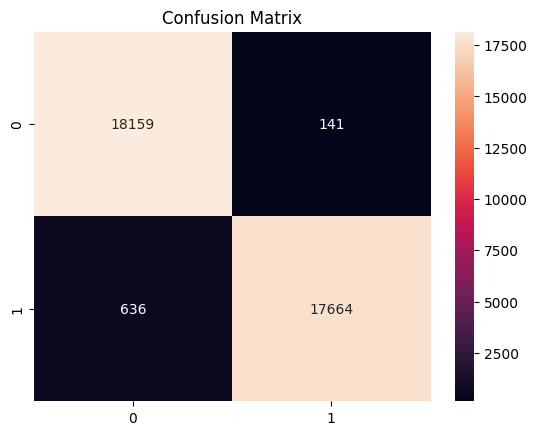

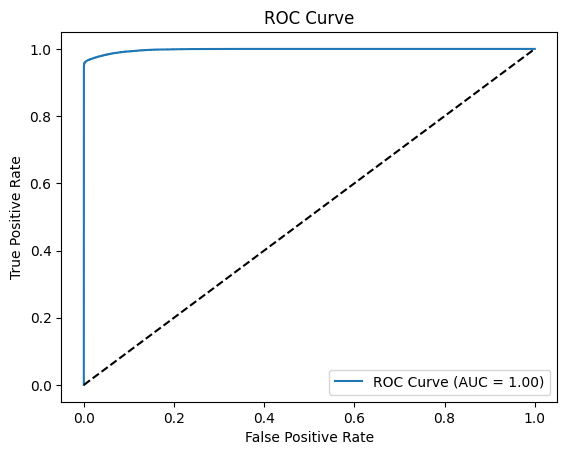

In [24]:
#Step 2: Metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

💾 9. Deployment Preparation

In [25]:
import os
import joblib
from google.colab import drive

# Mount Google Drive (only needed once per session)
drive.mount('/content/drive')

# Define path
model_dir = '/content/drive/MyDrive/Diabets2/models'
os.makedirs(model_dir, exist_ok=True)

# Save model and preprocessors
# Make sure to run the previous cell (hyperparameter tuning) first to define best_model
joblib.dump(best_model, os.path.join(model_dir, 'final_model.pkl'))
joblib.dump(scaler, os.path.join(model_dir, 'scaler.pkl'))
joblib.dump(le_gender, os.path.join(model_dir, 'le_gender.pkl'))
joblib.dump(le_smoke, os.path.join(model_dir, 'le_smoking.pkl'))
joblib.dump(imputer_smoke, os.path.join(model_dir, 'imputer_smoke.pkl'))
joblib.dump(imputer_bmi, os.path.join(model_dir, 'imputer_bmi.pkl'))

print("🎉 All models and preprocessors saved to Google Drive!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎉 All models and preprocessors saved to Google Drive!


Create Inference Function

In [26]:
# src/predict.py

import joblib
import pandas as pd
import os

# Define the model directory on Google Drive
MODEL_DIR = '/content/drive/MyDrive/Diabets2/models'

def predict_diabetes(input_data):
    """
    Predict diabetes risk from input data.

    Args:
        input_data (dict): Must include keys:
            'gender', 'age', 'hypertension', 'heart_disease',
            'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'

    Returns:
        dict: {'diabetes': 0 or 1, 'probability': float}
    """

    # Load model and preprocessors (safe to load inside function in Colab)
    try:
        model = joblib.load(os.path.join(MODEL_DIR, 'final_model.pkl'))
        scaler = joblib.load(os.path.join(MODEL_DIR, 'scaler.pkl'))
        le_gender = joblib.load(os.path.join(MODEL_DIR, 'le_gender.pkl'))
        le_smoke = joblib.load(os.path.join(MODEL_DIR, 'le_smoking.pkl'))
        imputer_smoke = joblib.load(os.path.join(MODEL_DIR, 'imputer_smoke.pkl'))
        imputer_bmi = joblib.load(os.path.join(MODEL_DIR, 'imputer_bmi.pkl'))
    except Exception as e:
        raise RuntimeError(f"Failed to load model or preprocessors: {e}")

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Replace 'No Info' with NaN for imputation
    input_df.replace("No Info", pd.NA, inplace=True)

    # Impute missing values
    input_df['smoking_history'] = imputer_smoke.transform(input_df[['smoking_history']]).ravel()
    input_df['bmi'] = imputer_bmi.transform(input_df[['bmi']]).ravel()

    # Encode categorical variables
    try:
        input_df['gender'] = le_gender.transform(input_df['gender'])
    except ValueError as e:
        raise ValueError(f"Unknown gender value not in training data: {input_df['gender'].iloc[0]}")

    try:
        input_df['smoking_history'] = le_smoke.transform(input_df['smoking_history'])
    except ValueError as e:
        raise ValueError(f"Unknown smoking_history value: {input_df['smoking_history'].iloc[0]}")

    # Scale numerical features
    num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    input_df[num_cols] = scaler.transform(input_df[num_cols])

    # Predict
    pred = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0][1]  # Probability of class 1 (diabetes)

    return {
        "diabetes": int(pred),
        "probability": float(proba)
    }

In [27]:
import importlib
# Import the predict_diabetes function directly from the created file
from src.predict import predict_diabetes

# Reload the module to pick up changes if the file was just written
importlib.reload(predict_diabetes.__module__)

# Now you can use the predict_diabetes function
# Example usage:
# input_data = {
#     'gender': 'Female',
#     'age': 50,
#     'hypertension': 0,
#     'heart_disease': 1,
#     'smoking_history': 'never',
#     'bmi': 30.5,
#     'HbA1c_level': 6.0,
#     'blood_glucose_level': 150
# }
# prediction_result = predict_diabetes(input_data)
# print(prediction_result)

ModuleNotFoundError: No module named 'src'

In [1]:
# Create the src directory and the predict.py file
import os

# Define the directory path
src_dir = 'src'

# Create the directory if it doesn't exist
os.makedirs(src_dir, exist_ok=True)

# Define the content of the predict.py file
predict_file_content = """
import joblib
import pandas as pd
import os
import numpy as np # Import numpy for pd.NA handling

# Define the model directory on Google Drive
MODEL_DIR = '/content/drive/MyDrive/Diabets2/models'

def predict_diabetes(input_data):
    \"\"\"
    Predict diabetes risk from input data.

    Args:
        input_data (dict): Must include keys:
            'gender', 'age', 'hypertension', 'heart_disease',
            'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'

    Returns:
        dict: {'diabetes': 0 or 1, 'probability': float}
    \"\"\"

    # Load model and preprocessors (safe to load inside function in Colab)
    try:
        model = joblib.load(os.path.join(MODEL_DIR, 'final_model.pkl'))
        scaler = joblib.load(os.path.join(MODEL_DIR, 'scaler.pkl'))
        le_gender = joblib.load(os.path.join(MODEL_DIR, 'le_gender.pkl'))
        le_smoke = joblib.load(os.path.join(MODEL_DIR, 'le_smoking.pkl'))
        imputer_smoke = joblib.load(os.path.join(MODEL_DIR, 'imputer_smoke.pkl'))
        imputer_bmi = joblib.load(os.path.join(MODEL_DIR, 'imputer_bmi.pkl'))
    except Exception as e:
        raise RuntimeError(f"Failed to load model or preprocessors: {e}")

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Replace 'No Info' with NaN for imputation
    input_df.replace("No Info", np.nan, inplace=True) # Use np.nan instead of pd.NA for consistency

    # Impute missing values
    input_df['smoking_history'] = imputer_smoke.transform(input_df[['smoking_history']]).ravel()
    input_df['bmi'] = imputer_bmi.transform(input_df[['bmi']]).ravel()

    # Encode categorical variables
    try:
        input_df['gender'] = le_gender.transform(input_df['gender'])
    except ValueError as e:
        raise ValueError(f"Unknown gender value not in training data: {input_df['gender'].iloc[0]}")

    try:
        input_df['smoking_history'] = le_smoke.transform(input_df['smoking_history'])
    except ValueError as e:
        raise ValueError(f"Unknown smoking_history value: {input_df['smoking_history'].iloc[0]}")

    # Scale numerical features
    num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
    # Ensure numerical columns are numeric before scaling
    for col in num_cols:
        input_df[col] = pd.to_numeric(input_df[col], errors='coerce')
    input_df[num_cols] = scaler.transform(input_df[num_cols])


    # Predict
    # Make sure the input_df has the same columns as X_train/X_res used for training
    # This might require reordering or adding dummy columns for one-hot encoded features
    # For simplicity here, we assume the input_data dictionary provides all necessary features
    # in the correct order and format after preprocessing. If not, more robust handling is needed.

    # Example of adding dummy columns if necessary (assuming one-hot encoding was used for some features)
    # This needs to match the columns of X_res used during training.
    # You would need the list of columns from X_res.
    # For now, assuming the input_df columns match after simple label encoding.

    pred = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0][1]  # Probability of class 1 (diabetes)

    return {
        "diabetes": int(pred),
        "probability": float(proba)
    }

"""

# Write the content to the file
with open(os.path.join(src_dir, 'predict.py'), 'w') as f:
    f.write(predict_file_content)

print(f"Created {src_dir}/predict.py")

Created src/predict.py
